In [1]:
!pip install selenium

In [2]:
from selenium import webdriver

In [22]:
driver = webdriver.Chrome('../driver/chromedriver')
driver.get("http://www.opinet.co.kr/searRgSelect.do")

//*[@id="quick_ul"]/li[2]/a/span

In [23]:
xpath ="""//*[@id="quick_ul"]/li[2]/a/span"""
driver.find_element_by_xpath(xpath).click()

//*[@id="SIGUNGU_NM0"]

In [24]:
gu_list_raw = driver.find_element_by_xpath("""//*[@id="SIGUNGU_NM0"]""")
gu_list = gu_list_raw.find_elements_by_tag_name("option")

In [25]:
gu_names = [option.get_attribute("value") for option in gu_list]
gu_names.remove('')
gu_names

['남구', '동구', '북구', '울주군', '중구']

In [19]:
element = driver.find_element_by_id("SIGUNGU_NM0")
element.send_keys(gu_names[1])

In [27]:
xpath = """//*[@id="searRgSelect"]/span"""#//*[@id="searRgSelect"]/span
element_sel_gu = driver.find_element_by_xpath(xpath).click()

In [21]:
xpath = """//*[@id="glopopd_excel"]"""#//*[@id="glopopd_excel"]/span
element_get_excel = driver.find_element_by_xpath(xpath).click()

In [28]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)
    
    time.sleep(2)
    
    xpath = """//*[@id="searRgSelect"]"""
    element_sel_gu = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)
    
    xpath = """//*[@id="glopopd_excel"]"""
    element_get_excel = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)

<ipython-input-28-a4bcbff9b01d>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(gu_names):


In [29]:
driver.close()

In [30]:
import pandas as pd
from glob import glob

In [31]:
glob('../data/지역_위치별(주유소)*xls')

['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (2).xls',
 '../data\\지역_위치별(주유소) (3).xls',
 '../data\\지역_위치별(주유소) (4).xls',
 '../data\\지역_위치별(주유소) (5).xls']

In [33]:
stations_files = glob('../data/지역_위치별(주유소)*xls')
stations_files

['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (2).xls',
 '../data\\지역_위치별(주유소) (3).xls',
 '../data\\지역_위치별(주유소) (4).xls',
 '../data\\지역_위치별(주유소) (5).xls']

In [34]:
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)
    
station_raw = pd.concat(tmp_raw)

In [35]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,울산광역시,광신직영(흥부셀프),울산 남구 월평로 152 (신정동),자가상표,052-265-6777,Y,-,1277,1077,777
1,울산광역시,강변주유소,울산 남구 남산로 17 (무거동),자가상표,052-222-4370,Y,-,1290,1090,-
2,울산광역시,강남셀프주유소,울산 남구 남산로 322,SK에너지,052-268-5149,Y,-,1298,1098,-
3,울산광역시,태화강셀프주유소,울산 남구 남산로 249 (신정동),SK에너지,052-265-1430,Y,-,1299,1099,-
4,울산광역시,(주)일광주유소,울산광역시 남구 산업로 93 (상개동),GS칼텍스,052-260-6860,Y,-,1299,1115,-


In [36]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 0 to 24
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      241 non-null    object
 1   상호      241 non-null    object
 2   주소      241 non-null    object
 3   상표      241 non-null    object
 4   전화번호    241 non-null    object
 5   셀프여부    241 non-null    object
 6   고급휘발유   241 non-null    object
 7   휘발유     241 non-null    object
 8   경유      241 non-null    object
 9   실내등유    241 non-null    object
dtypes: object(10)
memory usage: 20.7+ KB


In [37]:
stations = pd.DataFrame({'Oil_store':station_raw['상호'], 
                                       '주소':station_raw['주소'],
                                       '가격':station_raw['휘발유'],
                                       '셀프':station_raw['셀프여부'],
                                       '상표':station_raw['상표']  })
stations.head()

,Oil_store,주소,가격,셀프,상표
0,광신직영(흥부셀프),울산 남구 월평로 152 (신정동),1277,Y,자가상표
1,강변주유소,울산 남구 남산로 17 (무거동),1290,Y,자가상표
2,강남셀프주유소,울산 남구 남산로 322,1298,Y,SK에너지
3,태화강셀프주유소,울산 남구 남산로 249 (신정동),1299,Y,SK에너지
4,(주)일광주유소,울산광역시 남구 산업로 93 (상개동),1299,Y,GS칼텍스


In [38]:
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,광신직영(흥부셀프),울산 남구 월평로 152 (신정동),1277,Y,자가상표,남구
1,강변주유소,울산 남구 남산로 17 (무거동),1290,Y,자가상표,남구
2,강남셀프주유소,울산 남구 남산로 322,1298,Y,SK에너지,남구
3,태화강셀프주유소,울산 남구 남산로 249 (신정동),1299,Y,SK에너지,남구
4,(주)일광주유소,울산광역시 남구 산업로 93 (상개동),1299,Y,GS칼텍스,남구


In [39]:
stations[stations['가격']=='-']

,Oil_store,주소,가격,셀프,상표,구
61,무지개주유소,울산 남구 산업로 515 (여천동),-,Y,SK에너지,남구
36,지에스칼텍스(주)태화주유소,울산광역시 북구 염포로 278 (효문동),-,N,GS칼텍스,북구
37,새한주유소,울산 북구 효암로 84-1 (명촌동),-,N,현대오일뱅크,북구
101,대복주유소,울산 울주군 웅촌면 웅촌로 671,-,N,현대오일뱅크,울주군
102,신영주유소,울산 울주군 웅촌면 웅촌로 81,-,N,GS칼텍스,울주군
103,울산컨트리주유소,울산 울주군 웅촌면 웅촌로 29,-,Y,SK에너지,울주군
104,신광주유소,울산 울주군 서생면 연산3길 50,-,N,현대오일뱅크,울주군


In [40]:
stations = stations[stations['가격'] != '-']
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,광신직영(흥부셀프),울산 남구 월평로 152 (신정동),1277,Y,자가상표,남구
1,강변주유소,울산 남구 남산로 17 (무거동),1290,Y,자가상표,남구
2,강남셀프주유소,울산 남구 남산로 322,1298,Y,SK에너지,남구
3,태화강셀프주유소,울산 남구 남산로 249 (신정동),1299,Y,SK에너지,남구
4,(주)일광주유소,울산광역시 남구 산업로 93 (상개동),1299,Y,GS칼텍스,남구


In [41]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 0 to 24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Oil_store  234 non-null    object
 1   주소         234 non-null    object
 2   가격         234 non-null    object
 3   셀프         234 non-null    object
 4   상표         234 non-null    object
 5   구          234 non-null    object
dtypes: object(6)
memory usage: 12.8+ KB


In [42]:
stations['가격'] = [float(value) for value in stations['가격']]

In [43]:
stations.reset_index(inplace=True)
del stations['index']

In [44]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Oil_store  234 non-null    object 
 1   주소         234 non-null    object 
 2   가격         234 non-null    float64
 3   셀프         234 non-null    object 
 4   상표         234 non-null    object 
 5   구          234 non-null    object 
dtypes: float64(1), object(5)
memory usage: 11.1+ KB


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

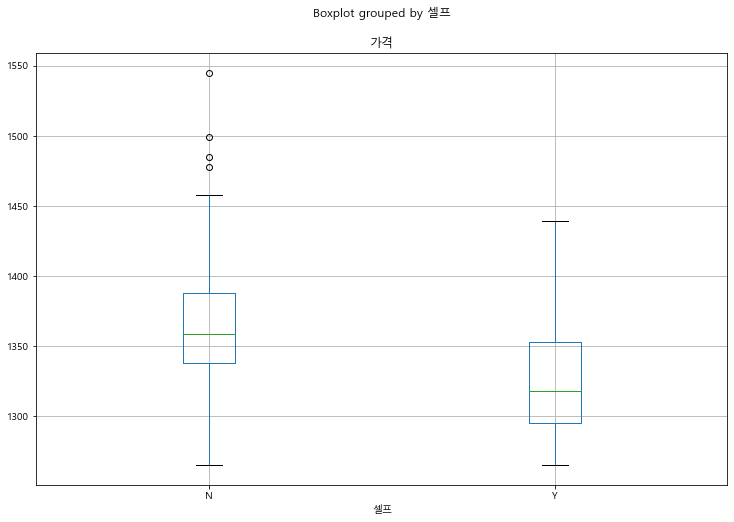

In [46]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8));

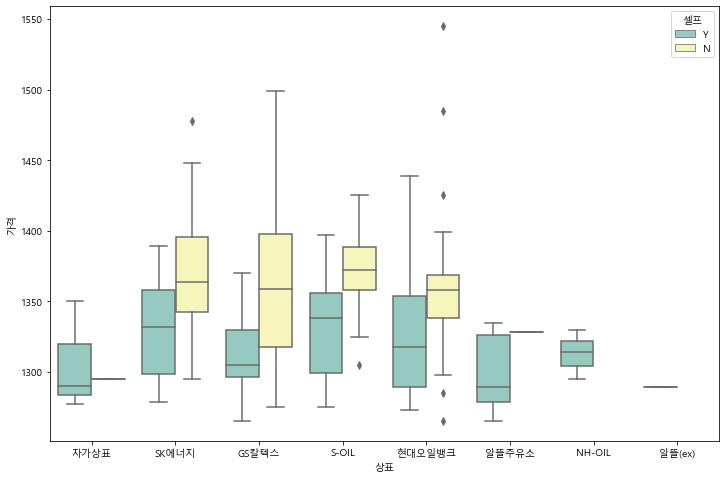

In [47]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", hue="셀프", data=stations, palette="Set3")
plt.show()

In [51]:
stations.sort_values(by='가격', ascending=True).head(10)

,Oil_store,주소,가격,셀프,상표,구
209,차세대주유소,울산 중구 구교로 170 (반구동),1265.0,Y,GS칼텍스,중구
72,현대주유소,울산 북구 산업로 1274 (창평동),1265.0,N,현대오일뱅크,북구
73,보경주유소(주),울산 북구 산업로 1602 (중산동),1265.0,Y,GS칼텍스,북구
74,신천셀프주유소,울산 북구 산업로 1481 (신천동),1265.0,Y,알뜰주유소,북구
61,소나타주유소,울산 동구 방어진순환도로 1280,1273.0,Y,현대오일뱅크,동구
108,율리셀프주유소,울산 울주군 청량면 웅촌로 1044,1275.0,Y,S-OIL,울주군
109,율선주유소,울산 울주군 청량면 웅촌로 1035,1275.0,N,GS칼텍스,울주군
62,남목주유소,울산 동구 방어진순환도로 1208 (서부동),1275.0,Y,알뜰주유소,동구
110,(주)좋은기름나라 웅촌지점,울산 울주군 웅촌면 웅촌로 724,1275.0,Y,S-OIL,울주군
0,광신직영(흥부셀프),울산 남구 월평로 152 (신정동),1277.0,Y,자가상표,남구
